Github link: https://github.com/skylery69/syin_markliu_494_final_project.git

In [47]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model

In [13]:
# Import the dataset
data = pd.read_csv('house_sales.csv')

# Get dimensions
rows, columns = data.shape

# Get data types
data_types = data.dtypes

# Get file type
file_type = 'CSV'  # Assuming the file is in CSV format

# Print dataset characteristics
print("Dimensions: {} rows, {} columns".format(rows, columns))
print("Data Types:")
print(data_types)
print("File Type: {}".format(file_type))


Dimensions: 21613 rows, 21 columns
Data Types:
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
File Type: CSV


In [14]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [15]:
# Calculate skewness for each numerical column
skewness = data.skew()

# Print skewness values
print("Skewness:")
print(skewness)

Skewness:
id                0.243329
price             4.024069
bedrooms          2.022672
bathrooms         0.504382
sqft_living       1.386147
sqft_lot         12.879729
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64


/Users/skyleryin/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [16]:
# Fill missing values
# Skewness is low, almost symetric, replace with mean
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)
data['sqft_living'].fillna(data['sqft_living'].mean(), inplace=True)

# Skewness is high, it's skewed, replace with median
data['sqft_lot'].fillna(data['sqft_lot'].median(), inplace=True)

# Verify missing values have been handled
print("Missing values after handling:")
print(data.isnull().sum())

# Save the cleaned dataset
data.to_csv('cleaned_house_sales.csv', index=False)

Missing values after handling:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [17]:
data = pd.read_csv('cleaned_house_sales.csv')

# Aggregation - Group data and calculate mean, median, or other aggregate functions
aggregated_data = data.groupby('zipcode')['price'].mean()

# Normalization - Scale numerical features to a specific range (e.g., 0 to 1) using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['sqft_living', 'sqft_lot']])

# Feature Construction - Create new features based on existing features
data['total_rooms'] = data['bedrooms'] + data['bathrooms']
data['total_sqft'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_basement']
data['price_per_sqft'] = data['price']/data['total_sqft']
data['months_sold'] = data['date'].str[4:6].astype(int)

# Save the transformed dataset
data.to_csv('transformed_house_sales.csv', index=False)

In [18]:
# Import the dataset
data = pd.read_csv('transformed_house_sales.csv')

# Define a function to remove outliers using the z-score method
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    df_cleaned = df[(z_scores < threshold).all(axis=1)]
    return df_cleaned

# Specify the columns to check for outliers
columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'total_rooms', 'price_per_sqft']

# Remove outliers using the z-score method
data_cleaned = remove_outliers_zscore(data, columns_to_check)

# Check the dimensions before and after removing outliers
print("Dimensions before removing outliers:", data.shape)
print("Dimensions after removing outliers:", data_cleaned.shape)

# Save the cleaned dataset
data_cleaned.to_csv('outliers_removed_house_sales.csv', index=False)

Dimensions before removing outliers: (21613, 25)
Dimensions after removing outliers: (20228, 25)


- Categorical variables:
    - id - a numerical identity field for each house sale
    - date - date when the house is sold
    - waterfront - binary field, 1 if the house has a waterfront, 0 for no waterfront
    - view - binary field, 1 if the house has a view, 0 for no view
    - condition - a number denoting the condition of the house(The higher the number is, the better condition it is)
    - yr_built - in which year is the house built
    - yr_renovated - year when a house is renovated, 0 if not renovated
- Ordinal variables
    - condition - a number denoting the condition of the house(The higher the number is, the better condition it is)
    - grade: a number denoting the grade of the house
    - zipcode - house location zipcode in the county
- Numerical variables
    - price - house sale price amount in US dollars (dependent variable)
    - bedrooms - number of bedrooms in the house
    - bathrooms - number of bathrooms in the house
    - sqft_living - living area in square feet
    - sqft_lot - total lot area in square feet
    - floors - number of floors in the house
    - sqft_basement - area in square feet if the house has a basement
    - lat - latitude cooridnate 
    - long - longitude coordinate
    - total_rooms - total number of rooms

Correlation coefficient: 0.06270437063026177
Measures of Centrality:
                         mean         median           mode
price           496955.597637  439950.000000  350000.000000
bedrooms             3.348060       3.000000       3.000000
bathrooms            2.059079       2.113507       2.500000
sqft_living       2008.569823    1950.000000    2081.073697
sqft_lot         10635.613605    7620.000000    7620.000000
price_per_sqft      54.161205      44.879184      35.714286

Measures of Distribution:
                          std           min           max
price           249820.865804  82000.000000  1.640000e+06
bedrooms             0.835212      1.000000  6.000000e+00
bathrooms            0.682729      0.000000  4.250000e+00
sqft_living        758.736027    370.000000  4.750000e+03
sqft_lot         13081.614145    572.000000  1.362900e+05
price_per_sqft      35.547964      1.531877  1.837117e+02


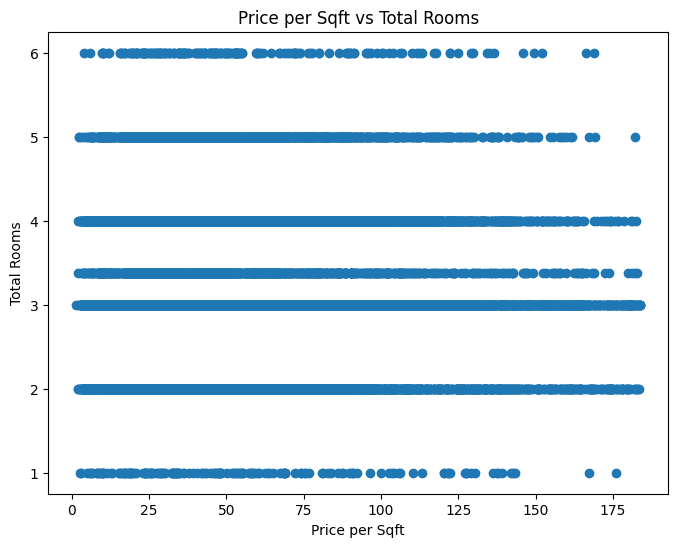

In [19]:
data = pd.read_csv('outliers_removed_house_sales.csv')

# Select numerical variables
numerical_variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'price_per_sqft']

# Calculate measures of centrality
centrality = data[numerical_variables].agg(['mean', 'median']).transpose()
centrality['mode'] = data[numerical_variables].mode().transpose()[0]

# Calculate measures of distribution
distribution = data[numerical_variables].agg(['std', 'min', 'max']).transpose()

# Calculate correlation
correlation = data['price_per_sqft'].corr(data['total_rooms'])
print('Correlation coefficient:', correlation)

# Print measures of centrality and distribution
print("Measures of Centrality:")
print(centrality)
print("\nMeasures of Distribution:")
print(distribution)

# Create scatter plot for price per square foot and number of rooms
plt.figure(figsize=(8, 6))
plt.scatter(data['price_per_sqft'], data['bedrooms'])
plt.xlabel('Price per Sqft')
plt.ylabel('Total Rooms')
plt.title('Price per Sqft vs Total Rooms')
plt.show()

On average, the price per sqft is higher for 3 and 2 rooms' houses, and it's lower for 1 and 6 room houses

Correlation coefficient: 0.06270437063026177
Measures of Centrality:
                     mean     median       mode
price_per_sqft  54.161205  44.879184  35.714286

Measures of Distribution:
                      std       min         max
price_per_sqft  35.547964  1.531877  183.711678

Monthly Mean:
months_sold
1     50.872633
2     51.838747
3     55.277786
4     57.029708
5     55.854378
6     54.376521
7     53.789414
8     52.701498
9     53.324929
10    55.712183
11    53.368825
12    51.730291
Name: price_per_sqft, dtype: float64


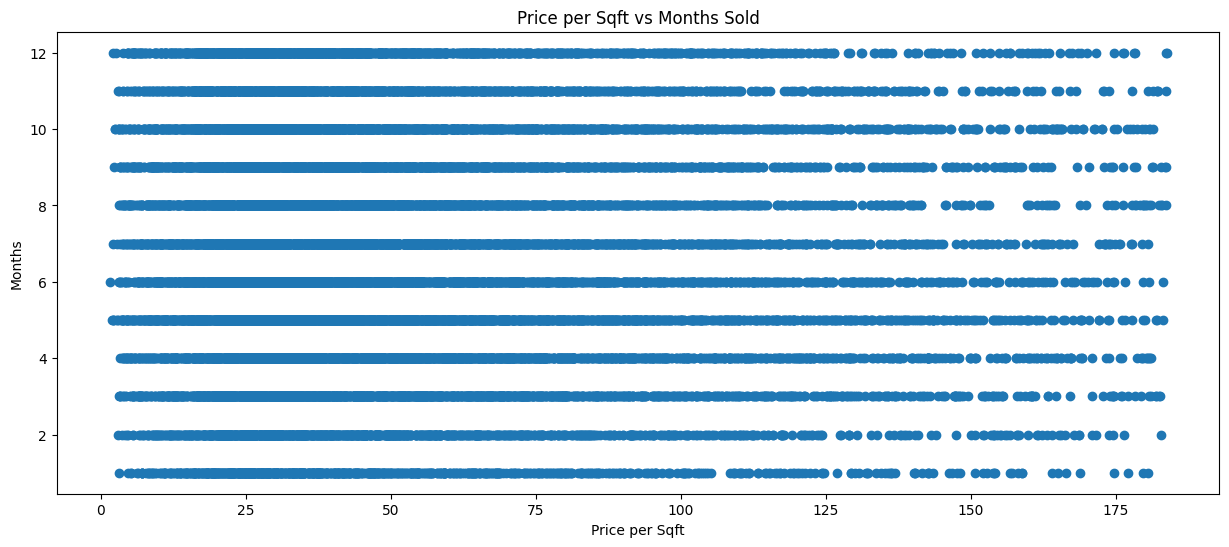

In [20]:
data = pd.read_csv('outliers_removed_house_sales.csv')
# Select numerical variables
numerical_variables = ['price_per_sqft']

# Calculate measures of centrality
centrality = data[numerical_variables].agg(['mean', 'median']).transpose()
centrality['mode'] = data[numerical_variables].mode().transpose()[0]

monthly_mean = data.groupby('months_sold')['price_per_sqft'].mean()

# Calculate measures of distribution
distribution = data[numerical_variables].agg(['std', 'min', 'max']).transpose()

# Calculate correlation
correlation = data['price_per_sqft'].corr(data['total_rooms'])
print('Correlation coefficient:', correlation)

# Print measures of centrality and distribution
print("Measures of Centrality:")
print(centrality)
print("\nMeasures of Distribution:")
print(distribution)
print("\nMonthly Mean:")
print(monthly_mean)
# Create scatter plot for price per square foot and date
plt.figure(figsize=(15, 6))
plt.scatter(data['price_per_sqft'], data['months_sold'])
plt.xlabel('Price per Sqft')
plt.ylabel('Months')
plt.title('Price per Sqft vs Months Sold')
plt.show()

On average, the price per sqft for each months is approximately the same. The March has the highest price per sqft and Janurary has the lowest price per sqft. The correlation coeffient is really close to 0, it has almost no relationship between the months sold and price per sqft

Correlation coefficient: 0.23388903685922996

Mean Price for each grade:
grade
5     30.380891
6     38.325070
7     48.666657
8     62.270668
9     66.276892
10    64.625435
11    59.701461
Name: price_per_sqft, dtype: float64


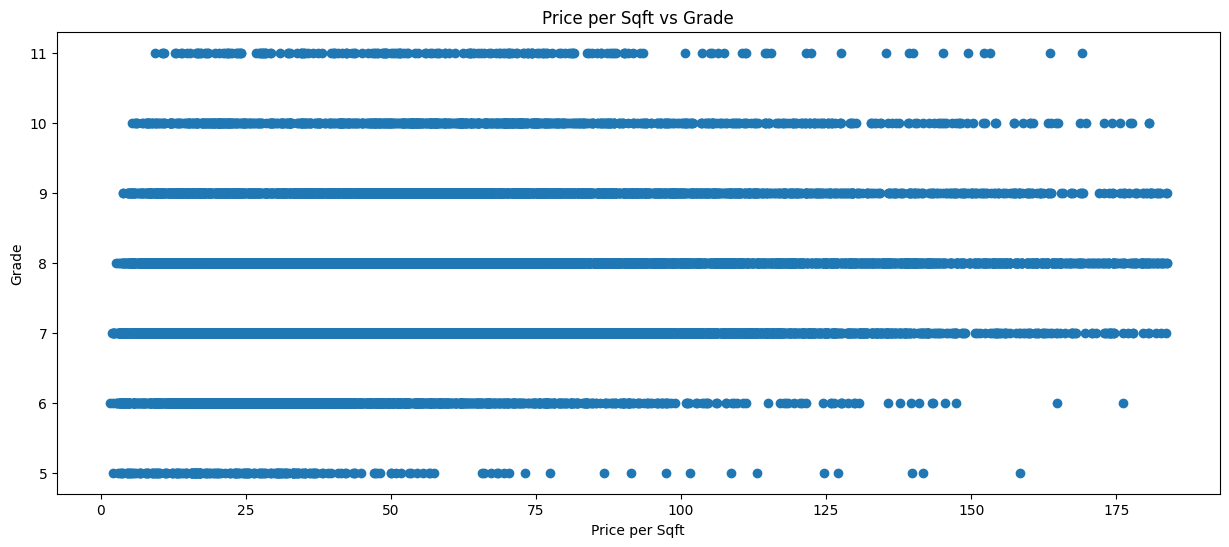

In [21]:
data = pd.read_csv('outliers_removed_house_sales.csv')

grades_mean = data.groupby('grade')['price_per_sqft'].mean()

# Calculate correlation
correlation = data['price_per_sqft'].corr(data['grade'])
print('Correlation coefficient:', correlation)

print("\nMean Price for each grade:")
print(grades_mean)
# Create scatter plot for price per square foot and date
plt.figure(figsize=(15, 6))
plt.scatter(data['price_per_sqft'], data['grade'])
plt.xlabel('Price per Sqft')
plt.ylabel('Grade')
plt.title('Price per Sqft vs Grade')
plt.show()

The correlation coefficient indicates that there is a possitive correlation between the price per sqft and the grade of the house. The price would increase as the grade increase.

It appears that the dataset is suitable for a supervised learning problem with a regression objective, because we want to find the relationship between the price per sqare feet and other variables. The goal is to predict the house sale price per sqaure feet, which is the dependent variable (target variable), based on one independent variable (features). The independent variables is grade

Mean Squared Error (MSE): 1239.493362219238
Root Mean Squared Error (RMSE): 35.20643921528046
Accuracy Score: 0.054257216609961856
[7.7868086]
[49.55501599 65.12863318 41.7682074  ... 49.55501599 49.55501599
 49.55501599]


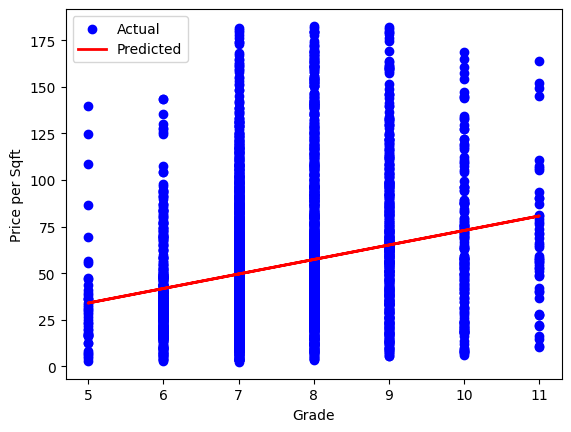

In [53]:
df = pd.read_csv('outliers_removed_house_sales.csv')
y = df['price_per_sqft']
X = df['grade'].values.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
regression = model.fit(X_train, y_train) 

# Test the model
y_pred = regression.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
accuracy = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Accuracy Score:", accuracy)
print(regression.coef_)
print(y_pred)

# Plot the model
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Grade')
plt.ylabel('Price per Sqft')
plt.legend()
plt.show()

